# SARIMA

Apakah kamu pernah mendengar tentang prediksi penjualan atau peramalan data? Bayangkan kamu adalah seorang pemilik toko yang ingin tahu berapa banyak barang yang harus dibeli untuk bulan depan agar tidak kehabisan stok. Bagaimana kamu bisa tahu? Di sinilah SARIMA datang membantu!

SARIMA adalah singkatan dari Seasonal Autoregressive Integrated Moving Average. Ini adalah metode yang digunakan untuk memprediksi nilai di masa depan berdasarkan data yang sudah ada sebelumnya. SARIMA sangat bagus untuk data yang memiliki pola musiman, seperti penjualan bulanan.

### Fungsi SARIMA
Pikirkan SARIMA sebagai alat untuk menghitung dan menebak seberapa banyak barang yang akan terjual di bulan-bulan berikutnya. Berikut adalah langkah-langkah bagaimana SARIMA bekerja:
1. Mempelajari Data Sebelumnya: SARIMA melihat data penjualan bulan-bulan sebelumnya untuk menemukan pola. Misalnya, jika kamu melihat bahwa penjualan selalu meningkat di bulan Desember karena Natal, SARIMA akan mencatat hal itu.
2. Menghilangkan Tren dan Pola: Sebelum membuat prediksi, SARIMA bisa membantu menghilangkan tren yang tidak diinginkan (seperti penjualan yang selalu naik) dan pola musiman (seperti penjualan yang meningkat setiap akhir tahun).
3. Membuat Prediksi: Setelah mempelajari data dan menghilangkan pola yang tidak perlu, SARIMA akan membuat prediksi untuk bulan-bulan berikutnya. Misalnya, setelah melihat data sebelumnya, SARIMA mungkin menyimpulkan bahwa pada bulan Januari, penjualan diperkirakan akan mencapai 500 unit.
4. Mengukur Ketepatan: Setelah prediksi dilakukan, SARIMA bisa membandingkan hasil prediksinya dengan data asli untuk melihat seberapa akurat prediksinya. Jika akurat, itu berarti SARIMA melakukan pekerjaan dengan baik!

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.stattools import adfuller 
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Penggunaan Data

In [2]:

df = pd.read_csv("penjualan.csv", sep=';')
display(df)

# Mengubah format data
# Fungsi id_vars untuk membaca baris
# Fungsi var_name untuk membaca kolom
# Fungsi value_name untuk membaca hasil
pisahdata = df.melt(id_vars=['Bulan'], var_name='Tahun', value_name='Sales')

# Mengubah kolom data sebelumnya yang sudah kita buat menjadi satu data tanggal yang utuh
pisahdata['Tanggal'] = pd.to_datetime(pisahdata['Tahun'] + ' ' + pisahdata['Bulan'])
# print(pisahdata)

# Mengatur Tanggal sebagai indeks dan memilih kolom yang relevan
sales_data = pisahdata.set_index('Tanggal')[['Sales']]

,Bulan,2020,2021,2022,2023
0,January,3488,4281,4396,3491
1,February,3764,3285,4664,3988
2,March,1437,1646,1755,1798
3,April,3667,3679,3380,3291
4,May,1349,1236,1669,1006
5,June,1411,1974,1097,1607
6,July,1157,1907,1064,1404
7,August,1166,1604,1327,1780
8,September,1873,1130,1575,1516
9,October,1991,1403,1601,1736


In [3]:
display(sales_data)

,Sales
Tanggal,
2020-01-01,3488
2020-02-01,3764
2020-03-01,1437
2020-04-01,3667
2020-05-01,1349
2020-06-01,1411
2020-07-01,1157
2020-08-01,1166
2020-09-01,1873


# 2. Visualisasikan Data Bulanan Tersebut

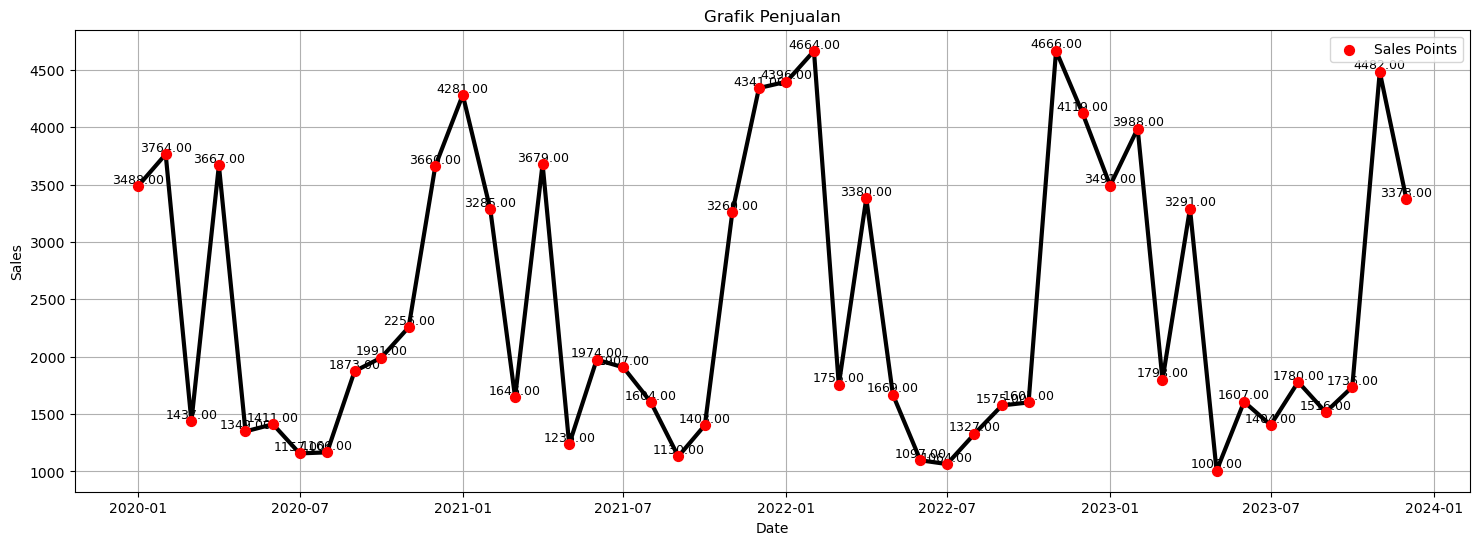

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6)) 

# Menggambar garis penjualan
plt.plot(sales_data['Sales'], linewidth=3, c='black') 

# Menambahkan titik pada setiap data penjualan
plt.scatter(sales_data.index, sales_data['Sales'], color='red', s=50, label='Sales Points', zorder=5) 

# Menambahkan tulisan nominal pada setiap titik
for i, value in enumerate(sales_data['Sales']):
    plt.text(sales_data.index[i], value, f'{value:.2f}', fontsize=9, ha='center', va='bottom')
    
plt.title("Grafik Penjualan") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend()  # Menampilkan legend
plt.grid()  # Menambahkan grid untuk lebih jelas
plt.show()


# 3. Lakukan Uji Statistioner

Langkah ini untuk menguji apakah data sudah statistik atau belum:
- Kalau datanya stasioner, artinya polanya tidak berubah terlalu banyak dari waktu ke waktu. Misalnya, penjualan naik atau turun tetapi rata-rata dan bentuk grafiknya tetap sama sepanjang waktu.
- Kalau datanya tidak stasioner, maka grafiknya bisa naik terus, turun terus, atau punya pola yang berubah-ubah, misalnya lebih tinggi di bulan tertentu dan lebih rendah di bulan lainnya.

Cara uji statistioner dapat dilakukan secara langsung dengan melihat grafiknya, tetapi ada juga penggunaan rumus untuk melihat apakah data sudah statistioner atau belum yaitu menggunakan teknik Augmented Dickey-Fuller (ADF).

### Hasil Uji:

Hasil uji menggunakan metode ADF sama seperti uji statistik, semakin ADF statictik jauh dari 0 maka data tersebut semakin stabil.

Hasil uji tersebut terbagi menjadi:
- jika p-value < 0,05 => data hasil uji stabil (Stationary)
- jika p-value > 0,05 => data hasil uji tidak stabil (Non Stationeary)

Selain itu, melihat dari data "Staionary" juga lebih baik. Nilai hasil "Stationary" harus lebih kecil dari nilai ADF, semakin kecil, menunjukkan data statisioner

In [5]:
def check_stationarity(timeseries): 
    result = adfuller(timeseries, autolag='AIC') 
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}') 
    print(f'p-value: {p_value}') 
    print(f'Statisioner: {result[4]}')
    if p_value < 0.05:
        Stasioner = 'stasioner'
    else:
        Stasioner = 'Non-stasioner'
    print(f'Disimpulkan berdasarkan analsisi ADF, P-Value, dan statisioner maka, hasilnya adalah {Stasioner}' )
    

check_stationarity(sales_data['Sales'])

ADF Statistic: -5.04479730158061
p-value: 1.80817094176583e-05
Statisioner: {'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}
Disimpulkan berdasarkan analsisi ADF, P-Value, dan statisioner maka, hasilnya adalah stasioner


# 4. Tentukan Parameter SARIMA

## Pada SARIMA, kita mengenal:
### p 
- p menunjukkan model akan "menggunakan berapa data bulan ke belakang untuk memprediksi bulan depan". Semakin besar p, semakin banyak bulan yang dilihat.

### d 
- d adalah “differencing” untuk menghilangkan tren.
- Bayangkan kamu punya data penjualan yang setiap bulan cenderung selalu naik terus menerus. d ini berfungsi untuk mengurangi atau menghilangkan tren kenaikan tersebut supaya datanya jadi lebih stabil dan tidak terlalu miring ke atas atau ke bawah.
- Cara kerja: Misalnya, kalau d=1, kita mengurangi setiap nilai dengan nilai sebelumnya. Jadi, kalau bulan ini penjualannya naik dari bulan sebelumnya, kita cuma lihat selisihnya, bukan jumlah totalnya.
- Gunanya: Untuk menghilangkan tren naik atau turun yang konsisten

### q 
- q mirip dengan p, tetapi pada q melihat kesalahan model dari bulan-bulan sebelumnya, jadi kalau ada salah di satu bulan, model bisa belajar dari kesalahan itu.

### P
- memiliki fungsi yang sama dengan p, tetapi pada P melihat pola tahunan

### D 
- D adalah “differencing” untuk menghilangkan pola musiman.
- Ini bekerja pada pola yang berulang setiap musim. Misalnya, jika penjualan selalu naik di akhir tahun, itu adalah pola musiman tahunan.
- D membantu menghilangkan pola berulang ini dengan membandingkan nilai saat ini dengan nilai yang sama di musim sebelumnya. Jika musimnya tahunan dan data bulanan, maka kita bandingkan nilai sekarang dengan nilai 12 bulan sebelumnya.
- Contoh: Kalau D=1, kita akan melihat perbedaan nilai penjualan dengan nilai satu tahun sebelumnya (12 bulan lalu).

### Q 
- Q mirip dengan q, tetapi pada Q melihat pola tahunan.

### S
- s adalah jumlah bulan dalam satu musim. Kalau data kamu bulanan dan pola musimnya tahunan, maka s=12.

In [6]:
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12

# 5. Latih Model SARIMA

In [1]:
model = SARIMAX(sales_data, order=(p, d, q), seasonal_order=(P, D, Q, s)) 
results = model.fit()
model

NameError: name 'SARIMAX' is not defined

# 6. Prediksi Periode Mendatang dengan SARIMA

In [8]:
Periode = 12
Prediksi = results.get_forecast(steps=Periode) 
Rata_Prediksi = Prediksi.predicted_mean 
Confiden_Interval_Prediksi = Prediksi.conf_int()
print("Rata-rata Prediksi Bulanan:")
display(Rata_Prediksi)

# Menampilkan interval kepercayaan untuk setiap prediksi
print("\nInterval Kepercayaan Prediksi (Lower, Upper):")
display(Confiden_Interval_Prediksi)

Rata-rata Prediksi Bulanan:


2024-01-01    3594.539976
2024-02-01    4026.862769
2024-03-01    1947.146808
2024-04-01    3454.778965
2024-05-01    1307.875537
2024-06-01    1726.734601
2024-07-01    1542.317831
2024-08-01    1810.614224
2024-09-01    1698.558882
2024-10-01    1903.035159
2024-11-01    4192.215553
2024-12-01    3567.340968
Freq: MS, Name: predicted_mean, dtype: float64


Interval Kepercayaan Prediksi (Lower, Upper):


,lower Sales,upper Sales
2024-01-01,2452.668847,4736.411105
2024-02-01,2849.925242,5203.800297
2024-03-01,766.405011,3127.888605
2024-04-01,2273.349248,4636.208681
2024-05-01,126.280183,2489.470891
2024-06-01,545.080514,2908.388687
2024-07-01,360.620474,2724.015189
2024-08-01,628.850969,2992.377479
2024-09-01,516.648631,2880.469133
2024-10-01,720.748069,3085.322248


## Hasil Prediksi Berdasarkan Kepercayaan Rata-Rata

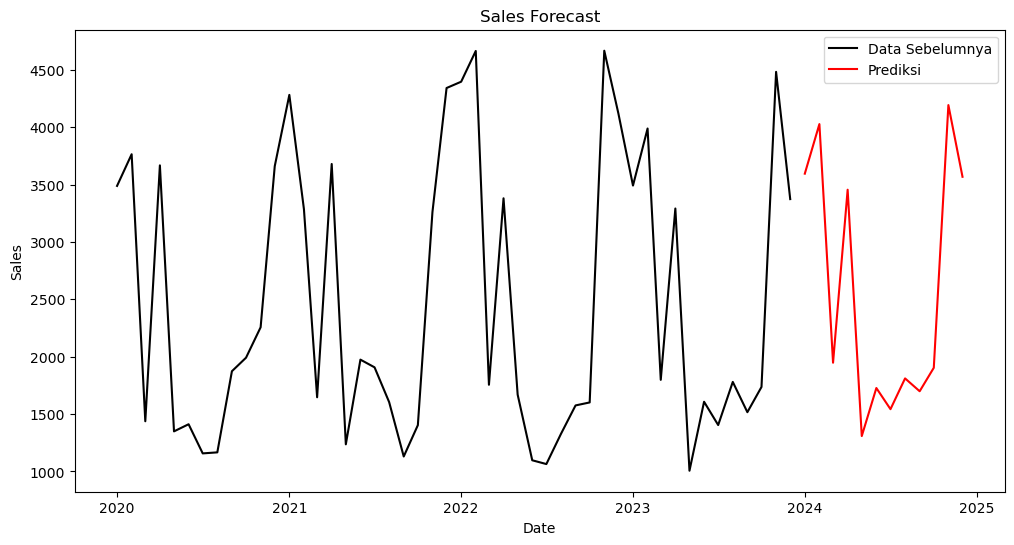

In [9]:
plt.figure(figsize=(12, 6)) 
plt.plot(sales_data, label='Data Sebelumnya', color='black') 
plt.plot(Rata_Prediksi, label='Prediksi', color='red') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()

## Hasil Prediksi Berdasarkan Maximum dan Minimum Prediksi

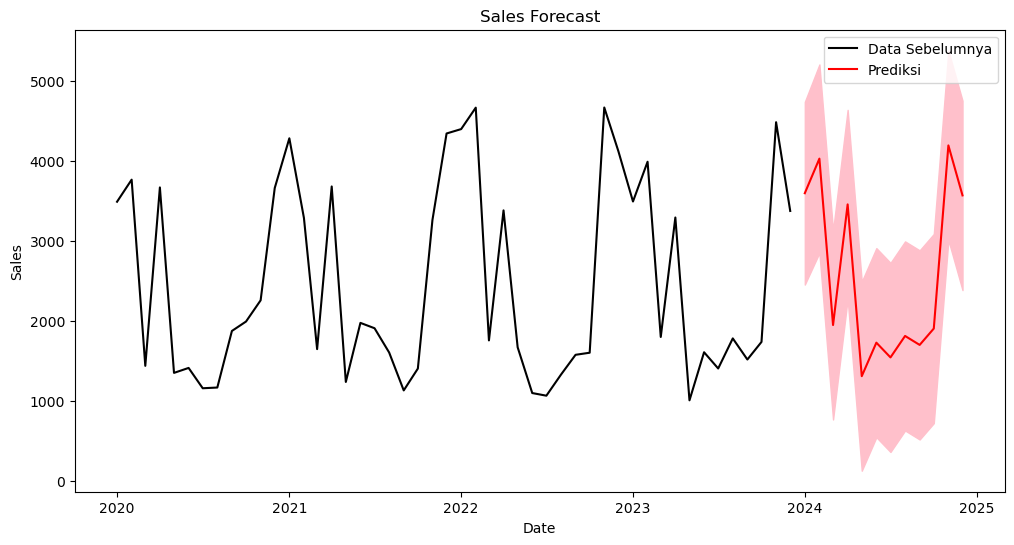

In [10]:
plt.figure(figsize=(12, 6)) 
plt.plot(sales_data, label='Data Sebelumnya', color='black') 
plt.plot(Rata_Prediksi, label='Prediksi', color='red') 
plt.fill_between(Confiden_Interval_Prediksi.index, Confiden_Interval_Prediksi.iloc[:, 0], Confiden_Interval_Prediksi.iloc[:, 1], color='pink') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()

# 7. Lakukan Uji MAE dan MSE

Kita bandingkan data prediksi kita dengan data aktual yang yang kita berikan nama "Data_sebelumnya". Uji tersebut dilakukan dengan uji MAE dan MSE:
### MAE menghitung rata-rata absolut dari error, mengukur deviasi prediksi dari nilai aktual tanpa memperhatikan arah deviasi. Uji MAE seperti:
- Menebak tinggi teman, dan setelah itu kamu melihat seberapa jauh tebakan dari tinggi sebenarnya. Semua selisih ini dihitung, lalu kita ambil rata-ratanya.

### MSE menghitung rata-rata dari error yang dikuadratkan, memperbesar error besar dan mengurangi pengaruh error kecil. Uji MSE seperti:
- Sama seperti MAE tetapi pada MSE menggunakan teknik pengkuadratan seperti (100-10)^2. Sehingga MSE memprediksi kesalahan yang lebih serius, terutama jika ada satu prediksi yang sangat salah. 



In [11]:
Data_sebelumnya = sales_data[-Periode:] 
print(Data_sebelumnya)
mae = mean_absolute_error(Data_sebelumnya, Rata_Prediksi) 
mse = mean_squared_error(Data_sebelumnya, Rata_Prediksi) 
print(f'MAE: {mae}') 
print(f'MSE: {mse}')

            Sales
Tanggal          
2023-01-01   3491
2023-02-01   3988
2023-03-01   1798
2023-04-01   3291
2023-05-01   1006
2023-06-01   1607
2023-07-01   1404
2023-08-01   1780
2023-09-01   1516
2023-10-01   1736
2023-11-01   4482
2023-12-01   3373
MAE: 156.63251388084038
MSE: 30817.112997201708



Interval Kepercayaan Prediksi (Lower, Upper):


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,lower Sales,upper Sales
2023-01-01,3192.088333,5768.363268
2023-02-01,3378.336616,6036.473854
2023-03-01,733.638453,3401.177708
2023-04-01,2311.220743,4980.483600
2023-05-01,596.570827,3266.223063
2023-06-01,145.572028,2815.338324
2023-07-01,85.747306,2755.592251
2023-08-01,290.504276,2960.498627
2023-09-01,544.022324,3214.399076
2023-10-01,602.985106,3274.374072


2023-01-01    4480.225801
2023-02-01    4707.405235
2023-03-01    2067.408080
2023-04-01    3645.852172
2023-05-01    1931.396945
2023-06-01    1480.455176
2023-07-01    1420.669779
2023-08-01    1625.501451
2023-09-01    1879.210700
2023-10-01    1938.679589
2023-11-01    4541.801500
2023-12-01    4251.299424
Freq: MS, Name: predicted_mean, dtype: float64

MAE: 421.6660497538406
MSE: 294926.6884255429


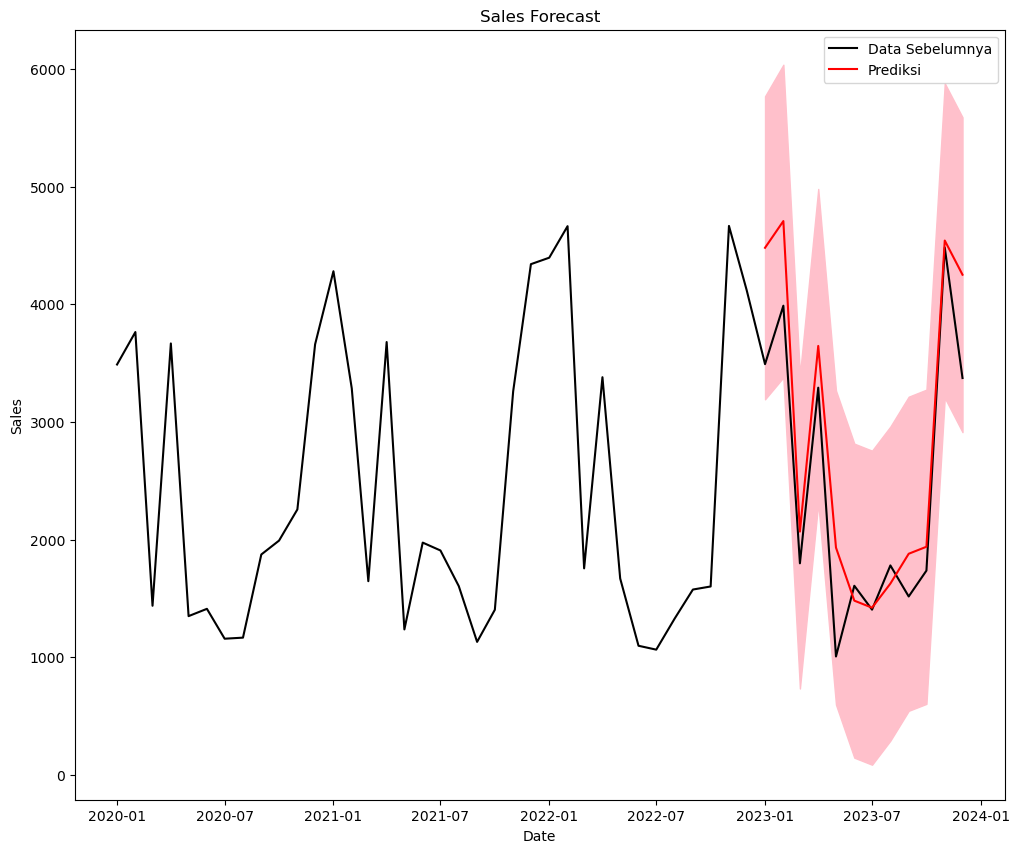

In [12]:
train_data = sales_data[:-12]
test_data = sales_data[-12:]

model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

forecast = results.get_forecast(steps=12)
predicted_mean = forecast.predicted_mean
confidence_interval = forecast.conf_int()

print("\nInterval Kepercayaan Prediksi (Lower, Upper):")
display(confidence_interval, predicted_mean)

mae = mean_absolute_error(test_data, predicted_mean)
mse = mean_squared_error(test_data, predicted_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

plt.figure(figsize=(12, 10)) 
plt.plot(sales_data, label='Data Sebelumnya', color='black') 
plt.plot(predicted_mean, label='Prediksi', color='red') 
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='pink') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()